Regression
=========

사이킷런을 활용한 다항 회귀
-------------

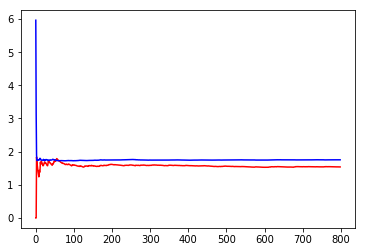

In [2]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## 데이터 x와 y를 생성합니다.
x = 3*np.random.rand(1000, 1) + 1
y = x**2 + x + 2 +5*np.random.rand(1000,1) 

# 1. 데이터 내의 각 특성값을 제곱하여 새로운 특성(feature)을 추가하는 PolynomialFeature객체를 생성합니다.(degree=2, include_bias=False)
poly_feat = PolynomialFeatures(degree=2, include_bias = False)

#  2. 각 데이터를 제곱하고 이를 특성에 추가시킨 후 poly_x에 저장합니다.(예: x=[0, 1, 2, 3] >> poly_x=[[0,0], [1,1], [2,4], [3, 9]]) 
poly_x = poly_feat.fit_transform(x)
# 3. 선형회귀 모델을 생성합니다.
linear_model = LinearRegression()
# 데이터 poly_x와 y를 모델에 피팅시킵니다.
linear_model.fit(poly_x, y)


# 학습률을 계산하고 이를 그래프로 표현하는 함수를 만듭니다.
def plotting_learning_curves(model, x, y):
    # 4. 데이터 x,y 를 train과 evaluation(혹은 validation) 데이터로 나누어줍니다.(Train:Eval=8:2)
    x_train, x_eval, y_train, y_eval = train_test_split(x, y, train_size = 0.8, test_size=0.2) 
    len_train = len(x_train)
    
    train_errors=[]
    eval_errors=[]
    
    for i in range(1,len_train):
        model.fit(x_train[:i], y_train[:i])
        pred_train = model.predict(x_train[:i])
        pred_eval = model.predict(x_eval)
        
        # 5. y_train[:i]와 pred_train 간의 평균제곱오차(mean_squared_errors)를 구한다.
        error_train = mse(y_train[:i], pred_train)
        
        # 6. y_eval과 pred_eval 간의 평균제곱오차(mean_squared_errors)를 구한다.
        error_eval = mse(y_eval, pred_eval)
        
        train_errors.append(error_train)
        eval_errors.append(error_eval)
    
    plt.plot(np.sqrt(train_errors), 'r', label="train")
    plt.plot(np.sqrt(eval_errors), 'b', label="evaluation")
    
    plt.savefig("result.png")
    
# 학습률을 계산하고 이를 그래프로 표현하는 함수를 완성했다면 함수를 실행합니다.
plotting_learning_curves(linear_model,x,y)

사이킷런으로 구현하는 릿지/라쏘/엘라스틱넷
--------------

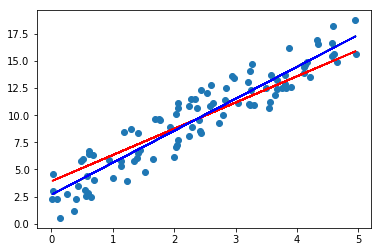

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import numpy as np

x = 5*np.random.rand(100,1)
y = 3*x + 5*np.random.rand(100,1)

#1.릿지 회귀를 구현하고 x,y 데이터를 바탕으로 학습시킵니다.
ridge_reg = Ridge(alpha=1e-3)
ridge_reg.fit(x,y)

#2.라쏘 회귀를 구현하고 x,y 데이터를 바탕으로 학습시킵니다.
lasso_reg = Lasso() # alpha=1e-3
lasso_reg.fit(x,y)

#3.엘라스틱넷을 구현하고 x,y 데이터를 바탕으로 학습시킵니다.
elastic_net =  ElasticNet(alpha=1e-3, l1_ratio=0.2)
elastic_net.fit(x,y)

#4.각 모델들을 이용하여 데이터 x에 대한 예측값을 변수에 따로 저장합니다.
ridge_y_pred = ridge_reg.predict(x)
lasso_y_pred = lasso_reg.predict(x)
elastic_y_pred = elastic_net.predict(x)

## 그래프로 나타내어 봅니다.
plt.scatter(x, y)

## 릿지 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,ridge_y_pred, color='green')

# 라쏘 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,lasso_y_pred, color='red')

## 엘라스틱넷 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,elastic_y_pred, color='blue')

# #그래프를 확인합니다.
plt.savefig("result.png")

당뇨 진행상황을 선형 회귀로 예측 해보기
------------------

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error as mse

## 당뇨병 관련 데이터셋을 불러옵니다.
train_data = ds.load_diabetes()

## 불러온 데이터셋에서 입력값(input)과 결과값(label)값을 불러오고 각각 변수에 저장합니다.
    ## 입력값(input)은 sklearn.preprocessing.normalize를 사용해서 값을 Normalize 합니다.
_input, _label = [normalize(train_data['data']), train_data['target']]

#1.불러온 입력값과 결과값을 train 데이터와 test 데이터로 나눕니다.(train - 80% / test - 20%)
input_train, input_test, label_train, label_test = train_test_split(_input, _label, test_size=0.2)

#선형회귀(LinearRegression) 모델을 불러옵니다.
linear_model = LinearRegression()

#2.선형회귀 모델을 데이터(input_train, label_train)에 대하여 학습시킵니다.
linear_model.fit(input_train, label_train)

#3.테스트 입력데이터(input_test)에 대해서 학습 모델의 예측을 실행합니다.
pred = linear_model.predict(input_test)

#4.실제값(label)과 예측값(pred) 간의 오차(평균제곱오차)를 출력하는 함수를 정의하고 출력합니다.
def get_mse(label,pred):
    error=mse(label_test, pred)
#     error = sum((label- pred) ** 2)
    return error 

print('MSE(평균제곱오차): ', get_mse(label_train, pred)) 

MSE(평균제곱오차):  3058.294120512282


보스턴 주택가격 예측
------------------

MSE: 21.185, RMSE: 4.603
회귀 계수값: [ -0.1   0.   -0.    2.5 -22.9   2.8   0.   -1.6   0.4  -0.   -0.9   0.
  -0.6]
RM          2.8
CHAS        2.5
RAD         0.4
B           0.0
TAX        -0.0
AGE         0.0
INDUS      -0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.6
NOX       -22.9
dtype: float64


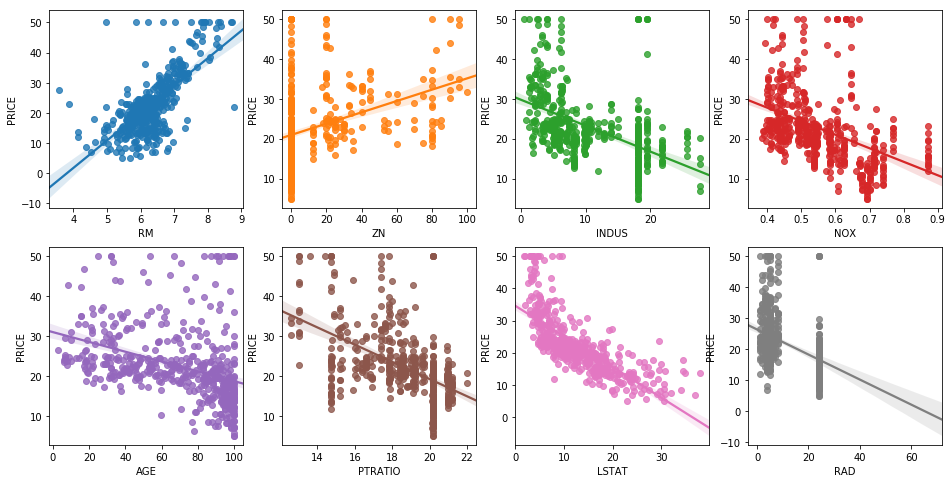

In [12]:
from scipy import stats
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


##데이터를 불러오는 함수를 만들어 봅니다.
def load_data():
    return datasets.load_boston()


##데이터셋에 data과 target 합한 DataFrame을 반환하는 함수를 만들어 봅니다.
def load_data_target(dataset):
    
    ##데이터셋의 Data를 DataFrame으로 만들어 줍니다.
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    #1.만들어준 DataFrame에 'PRICE'변수를 추가하고, target 데이터를 넣어준다.
    df['PRICE'] = load_data().target
    return df


##데이터를 Seaborn을 이용하여 시각화한다.
def plotting_graph(df):
    #2.Matplotlib.pyplot의 Subplots를 이용하여 2행 4열의[figsize=(16,8)] 그래프를 생성합니다.
    fig, axs = plt.subplots(2,4, figsize=(16, 8))
    ##특징들의 이름을 설정합니다.
    features = ['RM','ZN','INDUS','NOX','AGE', 'PTRATIO', 'LSTAT', 'RAD']
    
    ##Seaborn을 이용하여 특징들과 그 인덱스를 바탕으로 데이터를 시각화 합니다.
    for i, feature in enumerate(features):
        row = int(i/4)
        col = i%4
        ##seaborn.replot을 이용하여 변수와 그에 따른 Regression 그래프를 그려줍니다.
        sns.regplot(x = feature, y = 'PRICE', data = df, ax=axs[row][col])
        
    fig.savefig("result.png")


##데이터를 train/validation 데이터로 나누어주는 함수를 만들어 봅니다.
def data2train_eval(df):
    label_data = df['PRICE']
    input_data = df.drop(['PRICE'], axis=1, inplace=False)
    
    input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size=0.3, random_state=432)
    
    return input_train, input_eval, label_train, label_eval


##정의된 함수를 바탕으로 데이터를 분리하고 회귀(Regression)를 진행합니다.
def main():
    ## 데이터를 불러옵니다.
    df = load_data()
    ## 불러온 데이터를 DataFrame으로 추가시켜 줍니다.
    df_data_target = load_data_target(df)
    ## (Seaborn)그래프를 띄워서 변수 별로 대략적인 Regression이 어떻게 되는지 확인하여 봅니다.
    plotting_graph(df_data_target)

    input_train, input_eval, label_train, label_eval = data2train_eval(df_data_target)
    
    ## 회귀모델을 생성합니다.
    linear_model = LinearRegression()
    # 3.학습 데이터를 바탕으로 학습을 진행합니다.
    linear_model.fit(input_train, label_train)
    # 4.검증 데이터를 바탕으로 값을 예측합니다.
    pred = linear_model.predict(input_eval)
    # 5.검증 데이터의 제곱 평균 오차(mean squared error)를 계산합니다.
    mse = mean_squared_error(label_eval, pred)
    ## 검증 데이터의 루트 제곱 평균 오차(rooted mean squared error)를 계산합니다.
    rmse = np.sqrt(mse)


    print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse, rmse))
    #LinearRegression 모델의 상관계수를 구하고 출력합니다.
    print('회귀 계수값:', np.round(linear_model.coef_, 1))
    # 구한 상관계수를 큰 순서대로 출력합니다.
    coeff = pd.Series(data = np.round(linear_model.coef_, 1), index=input_train.columns)
    print(coeff.sort_values(ascending=False))
    
main()

선형 회귀 직접 구현하기
-------------------

a: [[0.64716734]] b: [[0.96099787]]


(array([[0.64716734]]), array([[0.96099787]]))

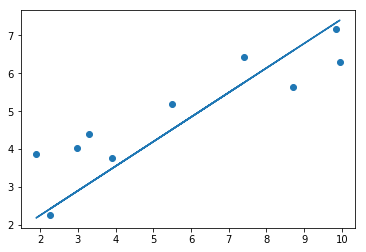

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
learning_rate = 1e-4
iteration = 10000

x = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])

##입력값(x)과 변수(a,b)를 바탕으로 예측값을 출력하는 함수를 만들어 봅니다.
def prediction(a,b,x):
    #1.Numpy 배열 a,b,x를 받아서 'x*(transposed)a + b'를 계산하는 식을 만듭니다.
    equation = x * a.T + b
    return equation

##변수(a,b)의 값을 어느정도 업데이트할 지를 정해주는 함수를 만들어 봅니다.
def update_ab(a,b,x,error,lr):
    ## a를 업데이트하는 규칙을 만듭니다..
    delta_a = -(lr*(2/len(error))*(np.dot(x.T, error)))
    ## b를 업데이트하는 규칙을 만듭니다.
    delta_b = -(lr*(2/len(error))*np.sum(error))
    
    return delta_a, delta_b

# 반복횟수만큼 오차(error)를 계산하고 a,b의 값을 변경하는 함수를 만들어 봅니다.
def gradient_descent(x, y, iters):
    ## 초기값 a= 0, b=0
    a = np.zeros((1,1))
    b = np.zeros((1,1))    
    
    for i in range(iters):
        #2.실제 값 y와 prediction 함수를 통해 예측한 예측값의 차이를 error로 정의합니다.
        error = y - prediction(a,b,x)
        #3.위에서 정의한 함수를 이용하여 a와 b 값의 변화값을 저장합니다.
        a_delta, b_delta = update_ab(a,b,x,error,learning_rate)
        ##a와 b의 값을 변화시킵니다.
        a -= a_delta
        b -= b_delta
    
    return a, b

##그래프를 시각화하는 함수입니다.
def plotting_graph(x,y,a,b):
    y_pred=a[0,0]*x+b
    plt.scatter(x, y)
    plt.plot(x, y_pred)
    plt.savefig("test.png")

# ##실제 진행 절차를 확인할 수 있는 main함수 입니다.
def main():
    a, b = gradient_descent(x, y, iters=iteration)
    print("a:",a, "b:",b)
    plotting_graph(x,y,a,b)
    return a, b

main()